**Aplicación de la técnica para desequilibrio de datos SMOTE-TOMELINK**

En este notebook aplicaremos las técnicas de sampling para desequilibrio de datos SMOTE-TOMELINKS sobre los 5 modelos de machine learning:





**Logistic Regression** 



**Support Vector Machine**


**Random Forest**



**Gradient Boosting  Classifier** 


**AdaBoost Classifier** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

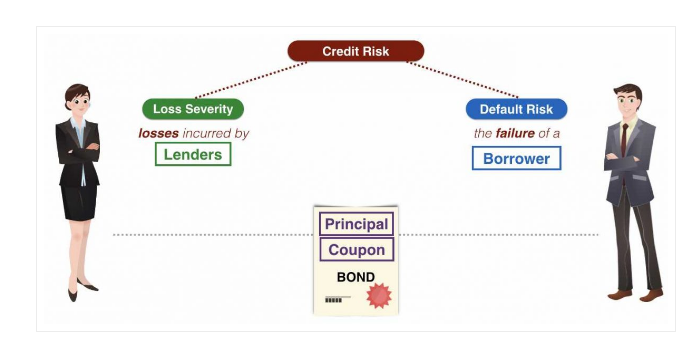

In [ ]:
#@ Riesgo de Crédito Data German Credit
from IPython.display import Image
Image("/content/drive/MyDrive/riesgo de credito.PNG")

La calificación crediticia es uno de los elementos centrales de la industria financiera , el cual intenta evaluar y medir la solvencia de los solicitantes de préstamos crediticios y clasificarlos en confiables y no confiables, con el objetivo de facilitar el proceso de toma de decisiones de los bancos e instituciones financieras sobre la aprobación de préstamos a los clientes. En general, los modelos de calificación crediticia confiables conducen a la reducción de costos, minimización de errores humanos o sesgos al aceptar o rechazar solicitudes de préstamos, y disminuir la probabilidad de rechazar solicitantes solventes o aceptar los de alto riesgo, que a su vez, se traducirán en menores riesgos financieros y mayores ganancias. Como resultado, en la literatura sobre calificación crediticia, está bien establecido que una pequeña mejora en el rendimiento de los modelos de calificación crediticia puede resultar en ahorros significativos

###### Modelos

In [ ]:
# 1. Libraries Implemented

In [ ]:
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

**Fuente de los datos:**

El conjunto de datos contiene 1000 filas con 10 variables .En este conjunto de datos, cada entrada representa a un cliente que recibe un crédito de un banco. Cada cliente se clasifica con riesgo crediticio bueno o malo según el conjunto de variables. El enlace al conjunto de datos original se puede encontrar a continuación.

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

https://www.kaggle.com/uciml/german-credit

**Variables:**

Edad (numérica)

Sexo (texto: masculino, femenino)

Trabajo (numérico: 0 - no calificado y no residente, 1 - no calificado y residente, 2 - calificado, 3 - altamente calificado)

Vivienda (texto: propia, alquilada o gratuita)

Cuenta de ahorros (texto: pequeño, moderado, bastante rico, rico)

Cuenta corriente (numérica, en DM - Deutsch Mark)

Monto del crédito (numérico, en DM)

Duración (numérica, en meses)

Propósito (texto: automóvil, muebles / equipo, radio / TV, electrodomésticos, reparaciones, educación, negocios, vacaciones / otros)

Risk: indica si el cliente cumplirá con el pago o no (Malo , bueno)

In [ ]:
# Cargando los datos alojadosn Drive

credit = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv")

In [ ]:
credit.head()   

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# print(data.rename(columns={'Index': 'newname'})) renombrar columnas con pandas Información

In [ ]:
credit.drop('Unnamed: 0', axis=1, inplace=True) # Eliminando columna Unnamed del dataframe

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Se observa que el data set tiene 1000 observaciones, 10 variables, 4 son numericas y el resto categóricas.

Las variables numéricas son:

Age

Job

Duration

Credit Amount

In [ ]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit["Default"] = credit["Risk"] # Creando la variable Default  (asignación de Risk a Default)
credit.info() # Validando que la variable Default se creo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
 10  Default           1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [ ]:
credit = credit.drop(columns="Risk")  # Eliminando la varible Risk
#credit.drop([ 'Risk'], axis=1) # Eliminando la varible Risk

In [ ]:

credit.info # Validando que la variable Risk  se elimino

<bound method DataFrame.info of      Age     Sex  Job  ... Duration              Purpose Default
0     67    male    2  ...        6             radio/TV    good
1     22  female    2  ...       48             radio/TV     bad
2     49    male    1  ...       12            education    good
3     45    male    2  ...       42  furniture/equipment    good
4     53    male    2  ...       24                  car     bad
..   ...     ...  ...  ...      ...                  ...     ...
995   31  female    1  ...       12  furniture/equipment    good
996   40    male    3  ...       30                  car    good
997   38    male    2  ...       12             radio/TV    good
998   23    male    2  ...       45             radio/TV     bad
999   27    male    2  ...       45                  car    good

[1000 rows x 10 columns]>

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit['Default'].value_counts()

good    700
bad     300
Name: Default, dtype: int64

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Default           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


**Removiendo  los missing por NaN**

In [ ]:
# Identificando valores NaN

credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Default               0
dtype: int64

Se observa que las variables Saving Accounts, y Checking account tienen la cantidad de 183 y 394, valores NA respectivamente.

In [ ]:
# Removiendo NA"S de la variables 'Saving accounts' y  'Checking account' 

In [ ]:
credit['Saving accounts'] = credit['Saving accounts'].fillna(value = 'NA') # Rellen con NA

In [ ]:
#Construye la distribución de frecuencias de la variable Saving accounts, con los NA
print(credit['Saving accounts'].value_counts())  # frecuencia de las categorias de Saving accounts

little        603
NA            183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


In [ ]:
credit['Checking account'] = credit['Checking account'].fillna(value = 'NA')

In [ ]:
credit['Checking account'].value_counts() #

NA          394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
credit.isnull().sum()  # Comprobando que elimino los NA

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Default             0
dtype: int64

In [ ]:
credit.head()  

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NA,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


**Analisis de datos Exploratorios**

In [ ]:
#Gráfico de Sexo  según Default

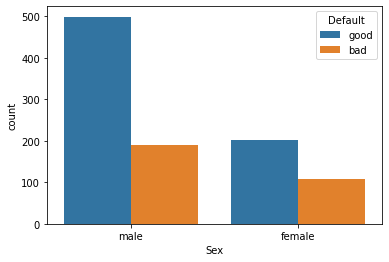

In [ ]:
sns.countplot(x= 'Sex', data = credit, hue= 'Default') # A python le importan las mayusculas

El gráfico indica que los clientes de sexo masculino, son más propensos a caer en Default, e incumplir con los pagos, respecto de las clientas femeninas.

In [ ]:
#Gráfico de Job  según Default

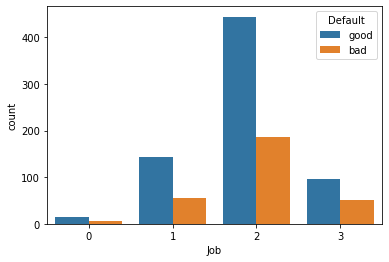

In [ ]:
sns.countplot(x= 'Job', data = credit, hue= 'Default')

Visualmente se indica que los clientes más probables para caer en Default, son aquellos clientes cuyo status en el trabajo es calificado, y altamente calificado.

In [ ]:
#Gráfico de Housing según Default

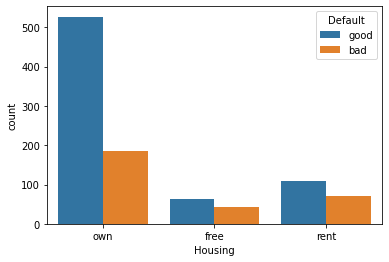

In [ ]:
sns.countplot(x= 'Housing', data = credit, hue= 'Default')

El gráfico indica que los clientes con tenencia de vivencia propia , son más propensos a caer en Default, e incumplir con los pagos, respecto de los clientes con tenencia de vivienda sin pagar.

In [ ]:
#Gráfico de Saving Account  según Default

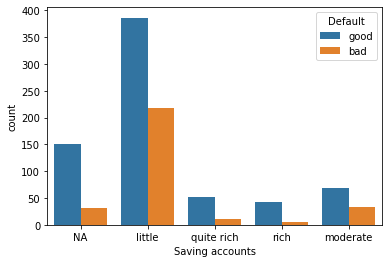

In [ ]:
sns.countplot(x= 'Saving accounts', data = credit, hue= 'Default')

 - Se observa que los clientes con ingresos bajos o moderados 'tienen más probabilidades de incumplir que el resto de los clientes

####  Proporcion de Savings Account con little o  moderate ingreso y su default nivel

In [ ]:
print("\nLittle Income :\n",credit[credit['Saving accounts'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income\n", credit[credit['Saving accounts'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      386
bad       217

Moderate Income
       Default
good       69
bad        34


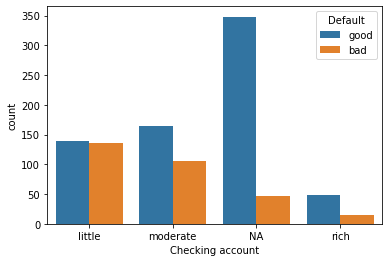

In [ ]:
sns.countplot(x= 'Checking account', data = credit, hue= 'Default')

Por lo tanto, los clientes con ingresos bajos o moderados tienen proporcionalmente más probabilidades de incumplir que los clientes de ingresos bajos.

**Proporción de cuentas de corriente con ingresos little o moderate y su nivel de Default**

In [ ]:
print("\nLittle Income :\n",credit[credit['Checking account'] == 'little']['Default'].value_counts().to_frame())
print("\nModerate Income :\n",credit[credit['Checking account'] == 'moderate']['Default'].value_counts().to_frame())


Little Income :
       Default
good      139
bad       135

Moderate Income :
       Default
good      164
bad       105


**Ingeniería de caracteristicas**

Según la inferencia de 'Cuenta de ahorros' y 'Cuenta corriente', podemos agrupar las columnas en 3 categorías:

'Little'

'Moderate'

'Other'

In [ ]:
# 'Saving Account'
credit['Saving accounts']=credit['Saving accounts'].map({'little': 'little', 'moderate': 'moderate', 'quite rich':'other','rich':'other', 'NA':'other' })

In [ ]:
# 'Checking Account'
credit['Checking account']= credit['Checking account'].map({'little': 'little', 'moderate': 'moderate','rich':'other', 'NA':'other' })

In [ ]:
## LabeEncoding the Purpose column
le = LabelEncoder()
credit['Purpose'] = le.fit_transform(credit['Purpose'])

In [ ]:
print("The various purposes are: ", le.classes_.tolist(), "\nAnd the hot encoded numbers for the same are", credit['Purpose'].unique().tolist())

The various purposes are:  ['business', 'car', 'domestic appliances', 'education', 'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'] 
And the hot encoded numbers for the same are [5, 3, 4, 1, 0, 2, 6, 7]


In [ ]:
credit.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Default
0,67,male,2,own,other,little,1169,6,5,good
1,22,female,2,own,little,moderate,5951,48,5,bad
2,49,male,1,own,little,other,2096,12,3,good
3,45,male,2,free,little,little,7882,42,4,good
4,53,male,2,free,little,little,4870,24,1,bad


**Procesamiento de datos:**

Asignación de caracteristicas 'Dependiente' y  'Independente' 

In [ ]:
##credit['default'] = credit['default'].map({'no':0, 'yes': 1})
credit['Default'] = credit['Default'].map({'good':0, 'bad': 1})


In [ ]:
print(credit['Default'].value_counts()) ## Distribución de frecuencia del target Default

0    700
1    300
Name: Default, dtype: int64


In [ ]:
#separating the y-column from the rest of the data

X=credit.drop("Default", axis=1)

y=credit["Default"]


In [ ]:
x1 = X.copy()

In [ ]:
x1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,other,little,1169,6,5
1,22,female,2,own,little,moderate,5951,48,5
2,49,male,1,own,little,other,2096,12,3
3,45,male,2,free,little,little,7882,42,4
4,53,male,2,free,little,little,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,other,1736,12,4
996,40,male,3,own,little,little,3857,30,1
997,38,male,2,own,little,other,804,12,5
998,23,male,2,free,little,little,1845,45,5


**Estandarización de los datos: Dummification de las caracteristicas categóricas y  Estandarizacion de las caracteristicas numéricas.**

In [ ]:
# List to store Categorical Columns
cat_cols = list(x1.columns[x1.dtypes == 'object'])
print("Categorical Columns: ",cat_cols)


Categorical Columns:  ['Sex', 'Housing', 'Saving accounts', 'Checking account']


In [ ]:
# List to store Numerical Columns
num_cols = list(x1.columns[x1.dtypes!= 'object'])
print("\nNumerical Columns:" ,num_cols)



Numerical Columns: ['Age', 'Job', 'Credit amount', 'Duration', 'Purpose']


###### *Etiquetado de caracteristicas categoricas:
    
###### La mayor parte de los agoritmos de ML, trabajan con caracteristicas numéricas.    

In [ ]:
## One-Hot Encoding de caracteristicas Categóricas
## drop_first=True evita la multicolibnealidad entre las caracteristicas

x1_dummy=pd.get_dummies(x1[cat_cols], drop_first=True)


In [ ]:
x1_dummy 

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other
0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1
996,1,1,0,0,0,0,0
997,1,1,0,0,0,0,1
998,1,0,0,0,0,0,0


In [ ]:

## Uniendo las caracteristicas   dummificadas con las caracteristicas  Numéricas

x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')
#x_new = pd.concat([x1_dummy, x1[num_cols]], axis=1, join='inner')

In [ ]:
x_new

,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_other,Checking account_moderate,Checking account_other,Age,Job,Credit amount,Duration,Purpose
0,1,1,0,0,1,0,0,67,2,1169,6,5
1,0,1,0,0,0,1,0,22,2,5951,48,5
2,1,1,0,0,0,0,1,49,1,2096,12,3
3,1,0,0,0,0,0,0,45,2,7882,42,4
4,1,0,0,0,0,0,0,53,2,4870,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,31,1,1736,12,4
996,1,1,0,0,0,0,0,40,3,3857,30,1
997,1,1,0,0,0,0,1,38,2,804,12,5
998,1,0,0,0,0,0,0,23,2,1845,45,5


**Estandarización**
    
StandardScaler estandariza una característica restando la media y 
luego escalando a la varianza de la unidad. La varianza unitaria significa dividir 
todos los valores por la desviación estándar. 

In [ ]:

#### Normalizing the Dataset
ss = StandardScaler()
x_normal = ss.fit_transform(x_new)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline, make_pipeline


**Dividiendo los datos en train y test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normal, y, test_size = 0.2, random_state = 2020,stratify=y)

random_state :

Se usa básicamente para reproducir su problema de la misma manera cada vez que se ejecuta. Si no usa un estado_aleatorio en train_test_split, cada vez que realice la división, es posible que obtenga un conjunto diferente de puntos de datos de Test y train y no lo ayudará a depurar en caso de que tenga un problema.

Es solo para asegurarse de obtener la misma división cada vez que ejecuta su script. Leyendo sobre generadores de números pseudoaleatorios, (un número como 32525352 tendría el mismo efecto que 0 o 1; es solo una constante que se asigna a algún estado interno) Si no lo hace, se inicializa en función del tiempo, lo que da como resultado, resultados diferentes en la mayoría de sus ejecuciones

In [ ]:
#### En el siguiente paso se busca mantener las poporcions de desequilibrio tanto en test como en prueba

In [ ]:
# Results from split
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=560, 1=240, Test: 0=140, 1=60


**Tratamiento de los datos desequilibrados**

Se aplican distintas técnicas sampling tales como: SMOTE, SMOTETOMELINK, ADASYNC, Oversampling para manejar este problema.

###### Técnica SMOTE-Tomelinks


In [ ]:


from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# summarize class distribution
print(Counter(y_train))
# define oversample strategy
sample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# fit and apply the transform
X_sample, y_sample = sample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_sample))



Counter({0: 560, 1: 240})
Counter({1: 560, 0: 528})


**Función para calcular recall**





Calcula el recall tanto en datos de entrenamiento como en datos de prueba.

In [ ]:
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)
    
    print("\n----------Accuracy Scores on Train data------------------------------------")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))


    print("\n----------Accuracy Scores on Test data------------------------------------")
    y_pred_test = model.predict(x_test)
    
    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    ax1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Train Data")

    ax2 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cbar=False,cmap='Greens',annot=True)
    plt.title("Normalized Confusion Matrix - Test Data")



In [ ]:
## Training the Logistic Regression model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.7380330722367275
Precision Score:  0.7198641765704584
Recall Score:  0.7571428571428571

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.6184210526315789
Precision Score:  0.5108695652173914
Recall Score:  0.7833333333333333


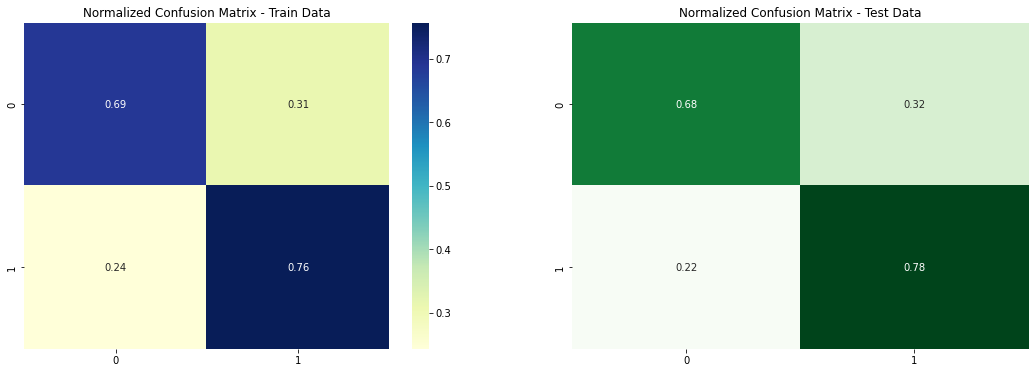

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 2020)
build_model_train_test(lm, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para la regresión logistica tanto en datos de train, como en datos de test, es de: 0.76 y 0.78 respectivamente.Por lo que tenemos un buen rendimiento

In [ ]:
## Training the SVM model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.715927750410509
Precision Score:  0.662613981762918
Recall Score:  0.7785714285714286

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5988023952095808
Precision Score:  0.4672897196261682
Recall Score:  0.8333333333333334


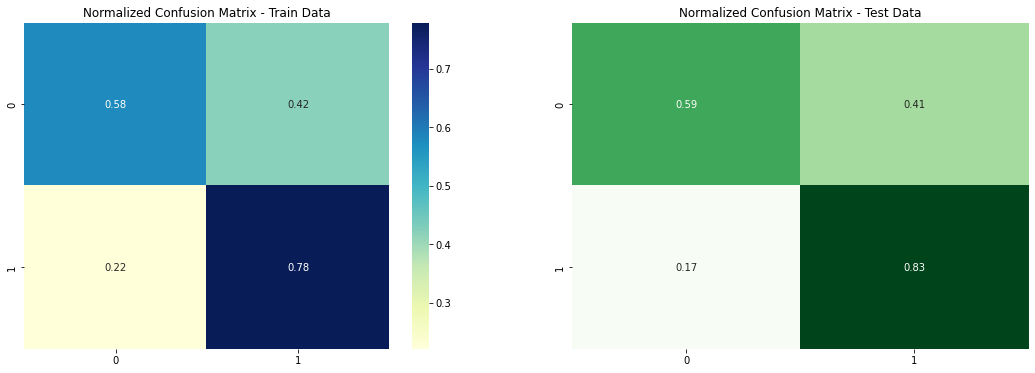

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
build_model_train_test(svm, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para el support vector machine tanto en datos de train, como en datos de test, es de: 0.78 y 0.83 respectivamente.Por lo que tenemos un buen rendimiento

In [ ]:
## Training the Random Forest model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.9856115107913668
Precision Score:  0.9927536231884058
Recall Score:  0.9785714285714285

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5321100917431193
Precision Score:  0.5918367346938775
Recall Score:  0.48333333333333334


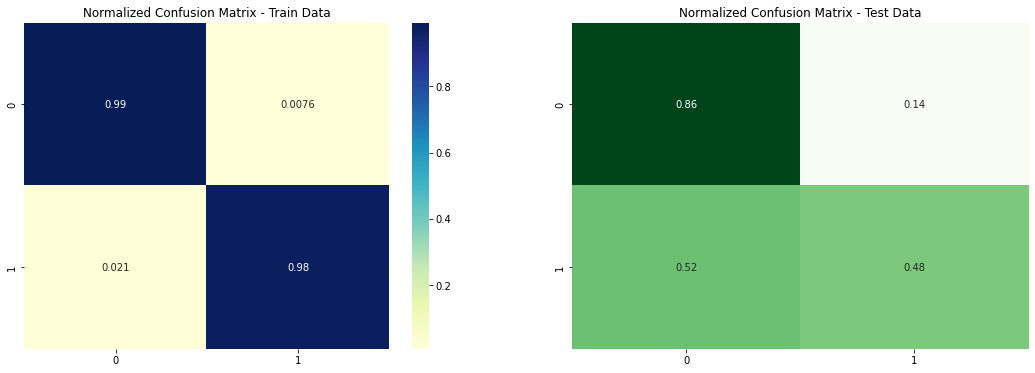

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2020)
build_model_train_test(rf, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para el Random Forest tanto en datos de train, como en datos de test, es de: 0.98 y 0.48 respectivamente.Por lo que el rendimiento de este modelo no es tan bueno.

In [ ]:
## Training the GradientBoostingClassifier model on the Training set


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.872207327971403
Precision Score:  0.8729874776386404
Recall Score:  0.8714285714285714

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5967741935483871
Precision Score:  0.578125
Recall Score:  0.6166666666666667


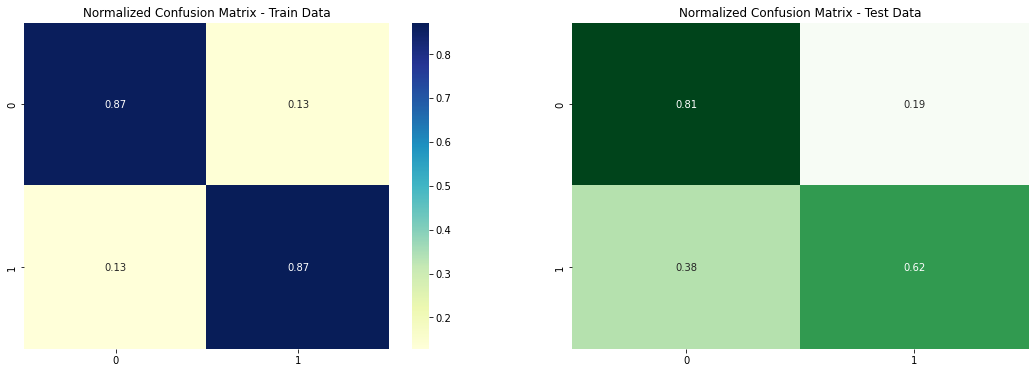

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier( random_state=1)

build_model_train_test(gbc, X_sample, X_test,y_sample,y_test)


Se observa que el recall, para el  Gradient Boosting Classifier tanto en datos de train, como en datos de test, es de: 0.87 y 0.62 respectivamente.

In [ ]:
#  ## Training the XGBoost Classifier model on the Training set 


----------Accuracy Scores on Train data------------------------------------
F1 Score:  0.8182616330114135
Precision Score:  0.8048359240069085
Recall Score:  0.8321428571428572

----------Accuracy Scores on Test data------------------------------------
F1 Score:  0.5909090909090908
Precision Score:  0.5416666666666666
Recall Score:  0.65


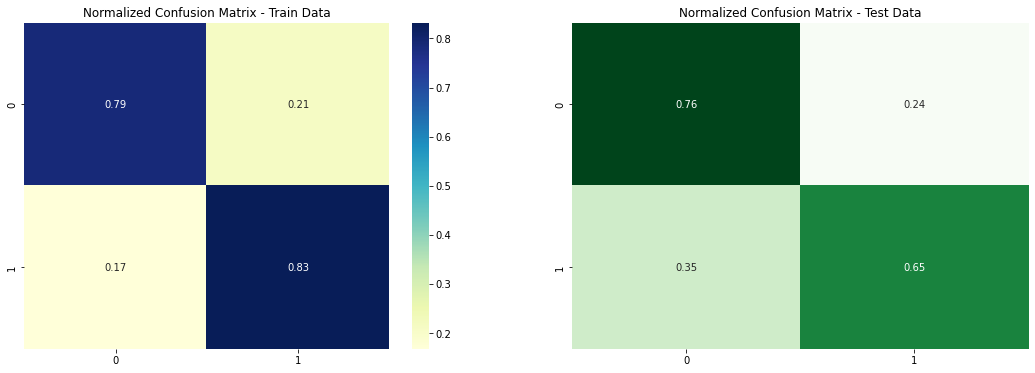

In [ ]:


# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier( random_state=42)

# Train Adaboost Classifer
build_model_train_test(abc, X_sample, X_test,y_sample,y_test)

Se observa que el recall, para el Adaboost tanto en datos de train, como en datos de test, es de: 0.83 y 0.65 respectivamente.Por lo que tenemos un buen rendimiento

**Cuáles son los 2 mejores modelos?**

**De los resultados de Recall, se observa que los mejores rendimientos se obtuvieron con el  modelo de Support Vector Machine y Regresión Logística, con recall de 0.83 y 0.78 respectivamente.**